In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv(r'C:\Drive (D)\College\SEM. - 6\ADML\Dataset\energydata_complete.csv')

In [21]:
df.sample(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
8616,2016-03-11 13:00:00,30,0,20.133333,35.090000,19.323333,34.363333,19.60,34.363333,20.700000,...,18.390000,39.53,8.300000,765.200000,59.000000,4.000000,63.000000,0.700000,9.662893,9.662893
18123,2016-05-16 13:30:00,360,0,23.200000,38.163333,22.764286,36.661429,24.70,37.000000,23.323333,...,22.890000,38.40,11.800000,761.300000,60.000000,1.000000,40.000000,4.200000,47.174670,47.174670
14045,2016-04-18 05:50:00,60,0,21.315000,38.567500,17.600000,43.826667,22.29,37.000000,21.830000,...,20.500000,39.59,0.433333,760.783333,96.833333,1.833333,55.000000,0.000000,21.197171,21.197171
12352,2016-04-06 11:40:00,60,0,21.926667,42.656667,20.890000,43.163333,23.20,39.790000,21.533333,...,20.926667,41.36,10.166667,753.733333,71.333333,5.666667,30.666667,5.233333,42.949337,42.949337
16539,2016-05-05 13:30:00,20,0,23.260000,28.996667,24.926667,24.063333,23.00,32.060000,22.700000,...,20.790000,35.26,17.400000,761.300000,30.000000,4.000000,34.000000,-0.500000,47.898840,47.898840


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [23]:
df.shape

(19735, 29)

In [24]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df['month'] = df['date'].dt.month

## EDA

In [27]:
corr = df.corr()['Appliances'].sort_values()
corr
# sns.heatmap(corr)

RH_out        -0.152282
RH_8          -0.094039
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
RH_9          -0.051462
Press_mm_hg   -0.034885
month         -0.011606
rv2           -0.011145
rv1           -0.011145
date          -0.009630
Visibility     0.000230
RH_5           0.006955
T9             0.010010
Tdewpoint      0.015353
RH_4           0.016965
T5             0.019760
T7             0.025801
RH_3           0.036292
T8             0.039572
T4             0.040281
T1             0.055447
T3             0.085060
RH_1           0.086031
Windspeed      0.087122
T_out          0.099155
T6             0.117638
T2             0.120073
lights         0.197278
Appliances     1.000000
Name: Appliances, dtype: float64

C:\Users\vedan\AppData\Local\Temp\ipykernel_19008\3729711901.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


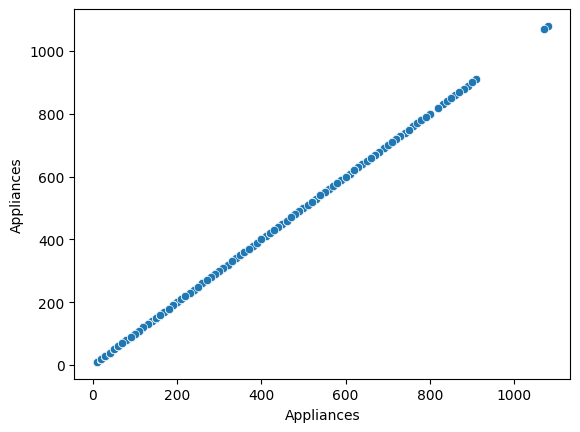

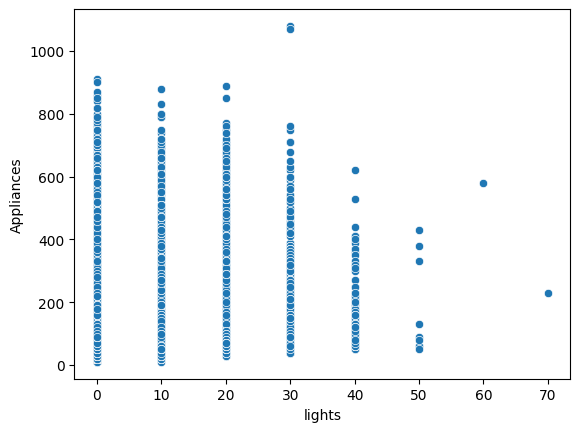

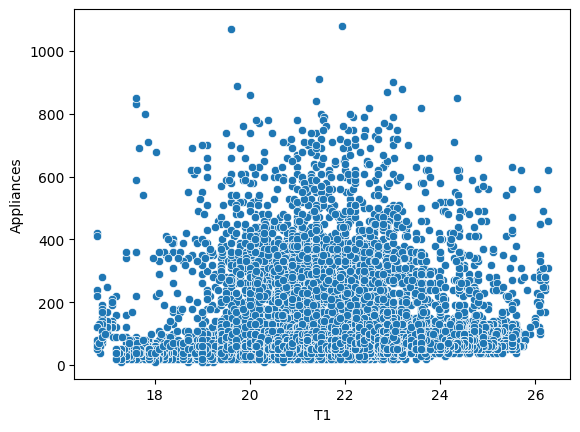

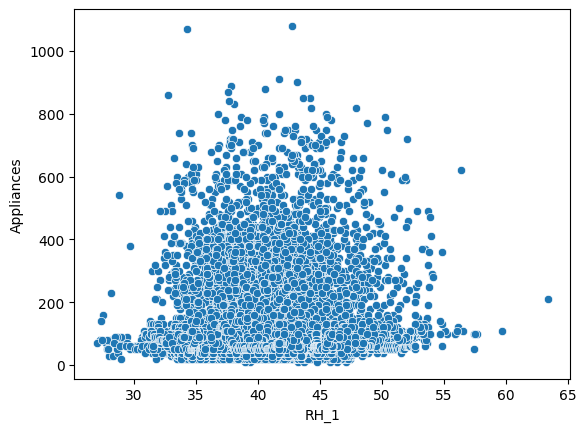

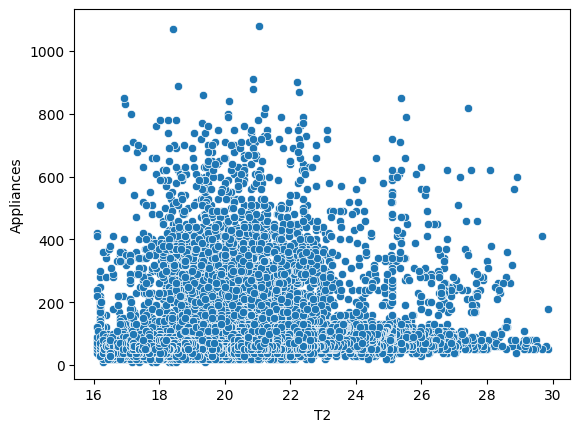

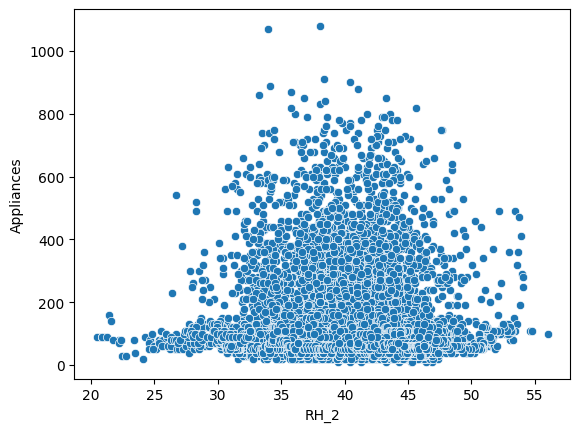

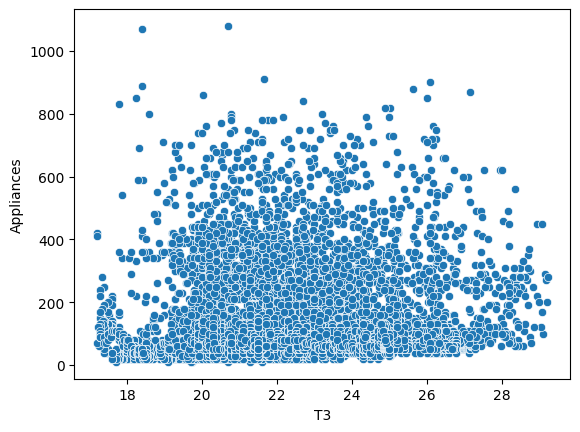

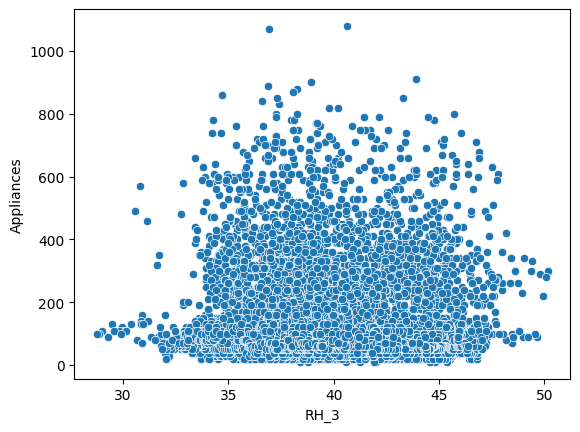

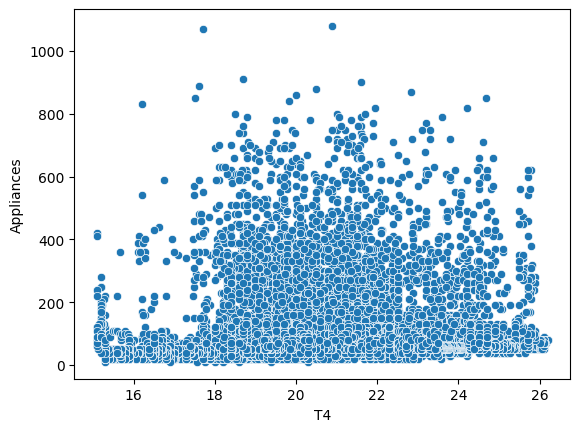

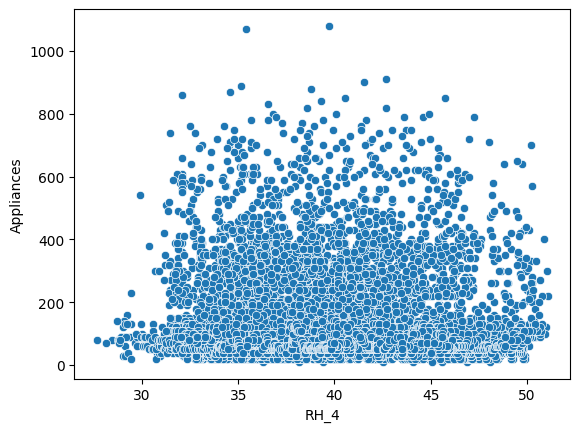

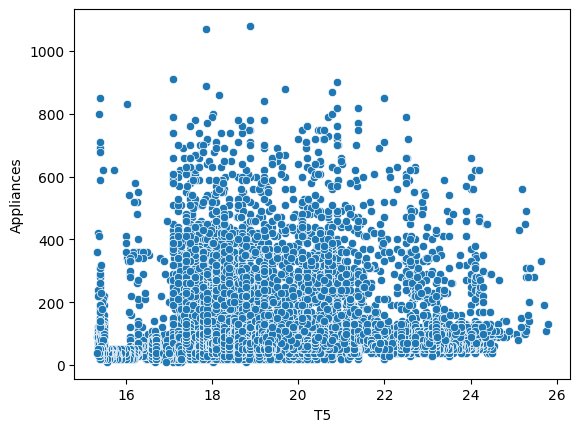

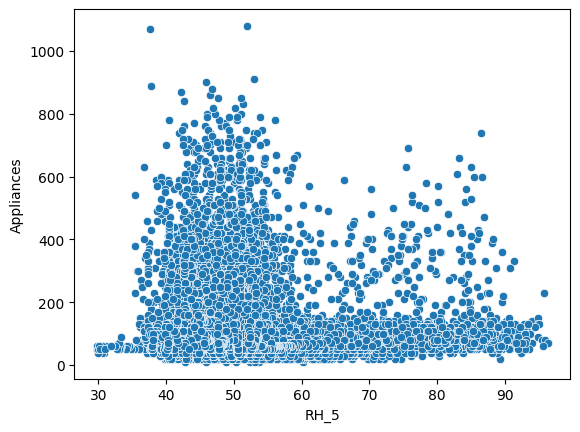

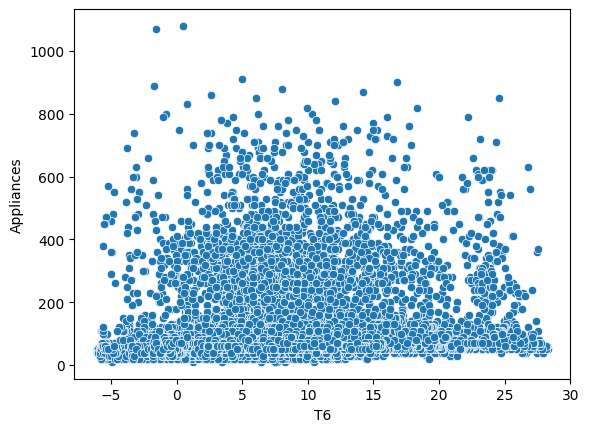

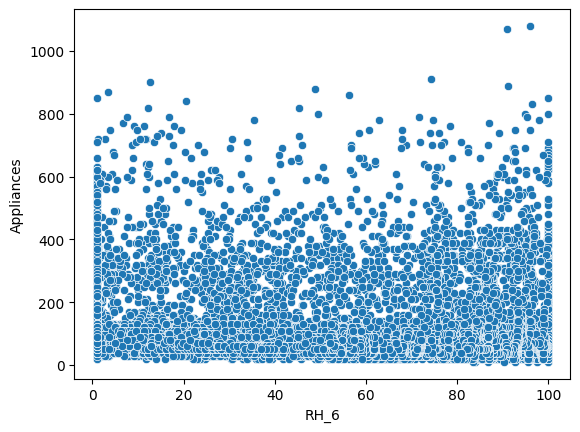

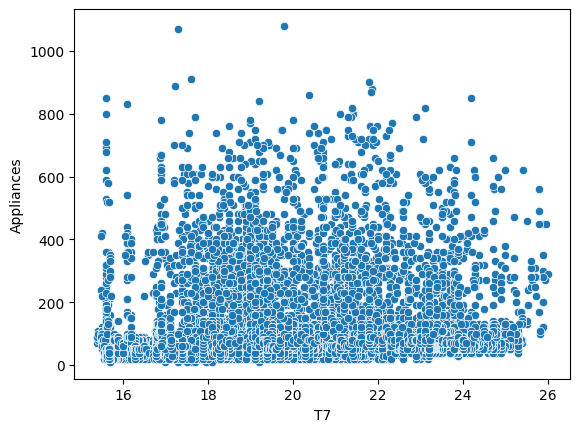

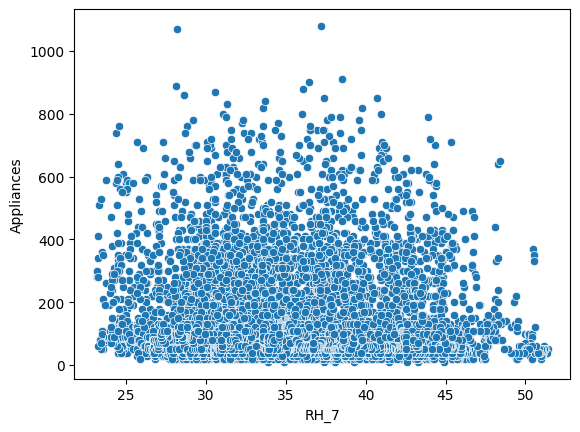

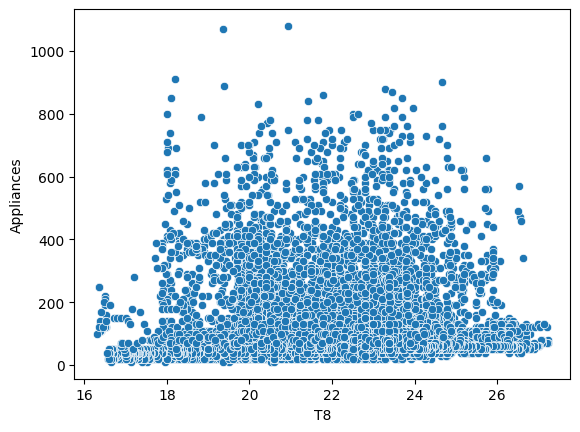

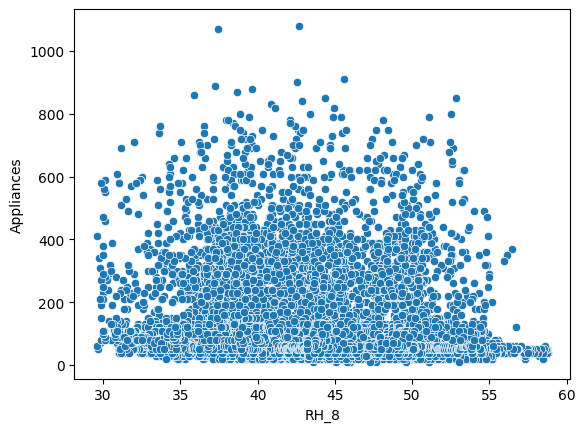

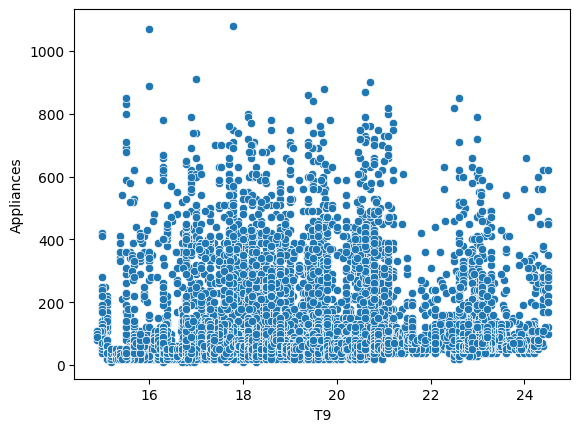

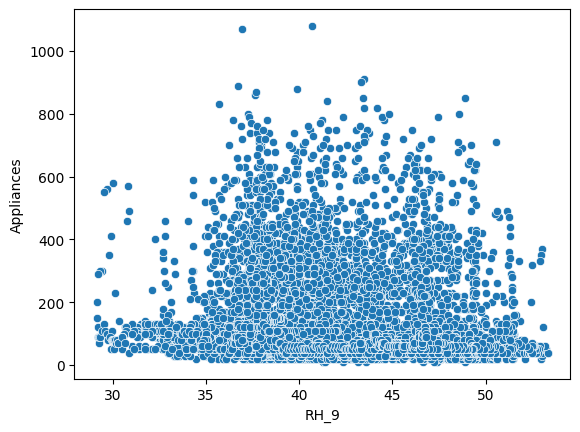

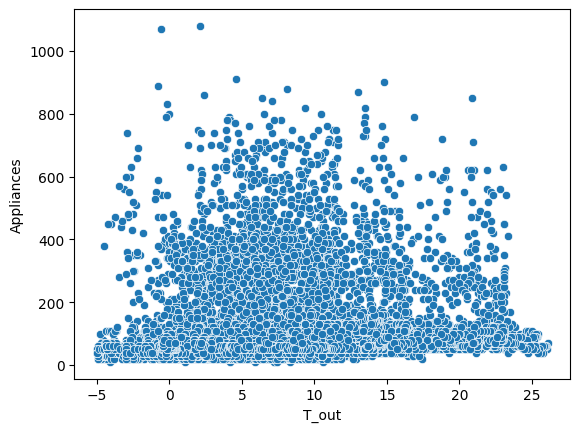

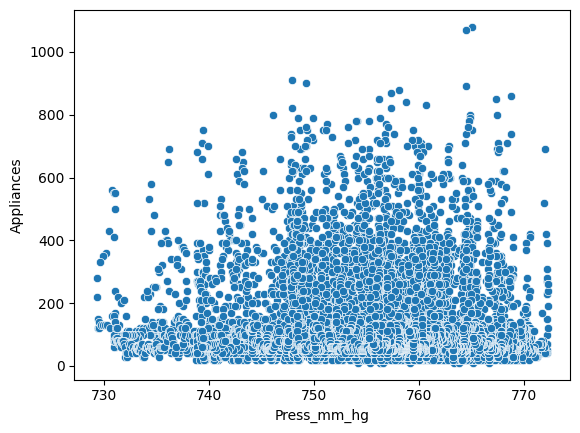

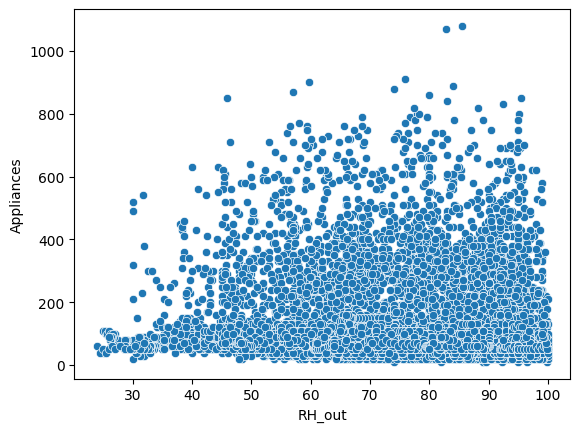

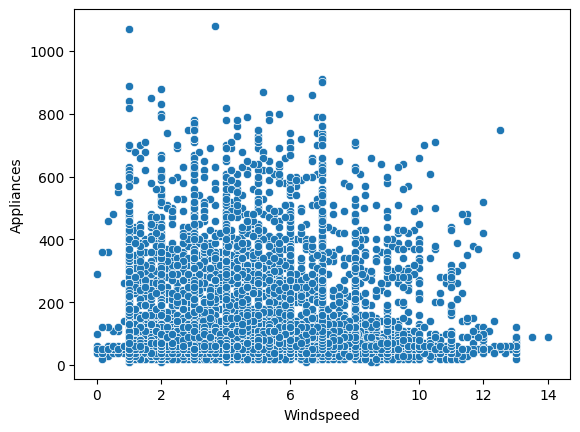

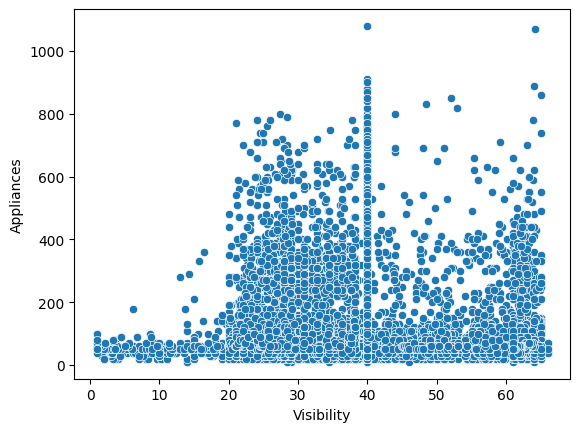

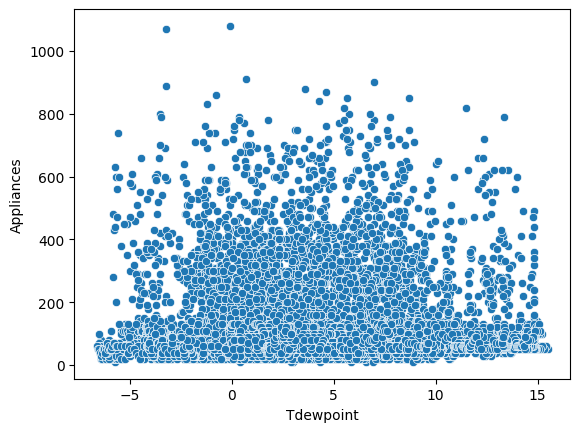

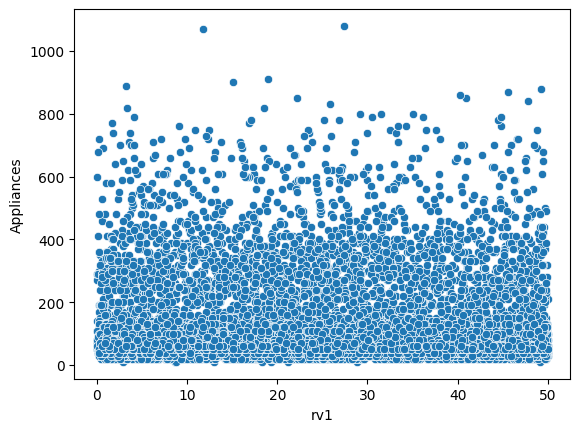

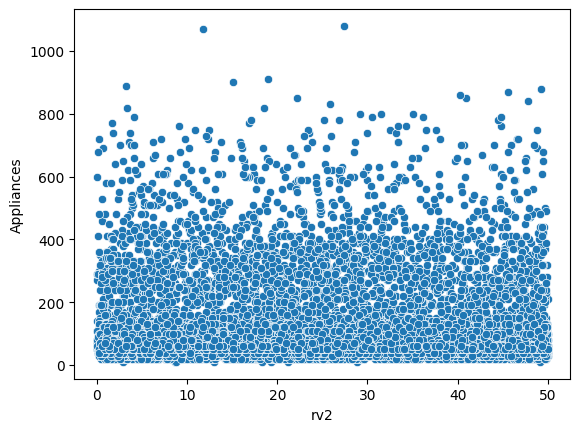

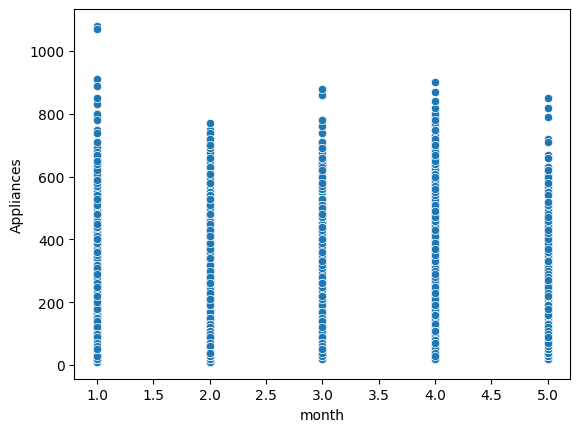

In [28]:
columns = list(df.columns)
columns.remove('date')

for column in columns:
    plt.figure()
    sns.scatterplot(x=column, y='Appliances', data=df)
    plt.plot()

## preprocessing

In [29]:
X = df.drop(['Appliances', 'date'], axis=1)
y = df['Appliances']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15788, 28), (15788,), (3947, 28), (3947,))

In [32]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = sc.transform(y_test.to_numpy().reshape(-1, 1))

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

## SVR

In [33]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [34]:
y_pred = svr.predict(X_test)
r2_score(y_test, y_pred)

0.23693965105435277

In [35]:
y_pred = svr.predict(X_train)
r2_score(y_train, y_pred)

0.26257587999277476

#### optuna

In [36]:
import optuna

c:\Users\vedan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 0.001, 10),
        'gamma': trial.suggest_float('gamma', 0.001, 10),
        # 'kernel': trial.suggest_categorical('kernel', ['poly', 'linear', 'rbf']),
    }

    kf = KFold(n_splits=5)
    scores = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        svr = SVR(**params)
        svr.fit(X_train[train_index], y_train.reshape(-1)[train_index])
        
        y_pred = svr.predict(X_train[test_index])
        score = r2_score(y_train[test_index], y_pred)

        scores.append(score)

    return np.mean(scores)

In [38]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective,n_trials = 10)

[I 2026-02-26 12:57:21,950] A new study created in memory with name: no-name-2b362688-4704-4200-bacc-c6680017ae60
[I 2026-02-26 12:59:02,314] Trial 0 finished with value: 0.06921500856851559 and parameters: {'C': 5.7597551194913414, 'gamma': 9.17543436230352}. Best is trial 0 with value: 0.06921500856851559.
[I 2026-02-26 13:00:06,733] Trial 1 finished with value: 0.09825156996295296 and parameters: {'C': 0.5737817295933687, 'gamma': 2.114757355572904}. Best is trial 1 with value: 0.09825156996295296.
[I 2026-02-26 13:01:36,783] Trial 2 finished with value: 0.2541784849978129 and parameters: {'C': 3.9867714693754817, 'gamma': 1.64762982767413}. Best is trial 2 with value: 0.2541784849978129.
[I 2026-02-26 13:03:11,466] Trial 3 finished with value: 0.21868805582961448 and parameters: {'C': 6.635586919727595, 'gamma': 2.176420970734232}. Best is trial 2 with value: 0.2541784849978129.
[I 2026-02-26 13:05:38,886] Trial 4 finished with value: 0.052207546192420365 and parameters: {'C': 1.75

## Random Forest

In [39]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.5286506329999423

In [41]:
y_pred = rf.predict(X_train)
r2_score(y_train, y_pred)

0.9328640336296737

In [42]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 300),
        'max_depth': trial.suggest_int('max_depth', 1, 300),
        'max_features': trial.suggest_int('max_features', 1, 20),
    }

    kf = KFold(n_splits=5)
    scores = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        rf = RandomForestRegressor(**params, n_jobs=-1, random_state=42)
        rf.fit(X_train[train_index], y_train[train_index])
        
        y_pred = rf.predict(X_train[test_index])
        score = r2_score(y_train[test_index], y_pred)

        scores.append(score)

    return np.mean(scores)

In [43]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective,n_trials = 50)

[I 2026-02-26 13:21:01,184] A new study created in memory with name: no-name-d66e02d7-a0f7-43a0-93a5-df426f6f422e
[I 2026-02-26 13:21:24,000] Trial 0 finished with value: 0.5073157760707644 and parameters: {'n_estimators': 298, 'max_depth': 141, 'max_features': 13}. Best is trial 0 with value: 0.5073157760707644.
[I 2026-02-26 13:21:29,298] Trial 1 finished with value: 0.4968935991844945 and parameters: {'n_estimators': 51, 'max_depth': 65, 'max_features': 16}. Best is trial 0 with value: 0.5073157760707644.
[I 2026-02-26 13:21:33,734] Trial 2 finished with value: 0.5001510812210728 and parameters: {'n_estimators': 56, 'max_depth': 243, 'max_features': 12}. Best is trial 0 with value: 0.5073157760707644.
[I 2026-02-26 13:21:46,667] Trial 3 finished with value: 0.502533890414824 and parameters: {'n_estimators': 132, 'max_depth': 169, 'max_features': 16}. Best is trial 0 with value: 0.5073157760707644.
[I 2026-02-26 13:21:50,703] Trial 4 finished with value: 0.4982611601321736 and parame

In [44]:
rf = RandomForestRegressor(**study.best_params, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=136, max_features=3, n_estimators=289,
                      random_state=42)

In [45]:
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.585075099177052

In [46]:
y_pred = rf.predict(X_train)
r2_score(y_train, y_pred)

0.9408813075961836

## Decision Tree

In [47]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
y_pred = dtr.predict(X_test)
r2_score(y_test, y_pred)

0.13979163879491052

In [49]:
y_pred = dtr.predict(X_train)
r2_score(y_train, y_pred)

1.0

In [50]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 100),
        'max_features': trial.suggest_int('max_features', 1, 24),
    }

    kf = KFold(n_splits=5)
    scores = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        dt = DecisionTreeRegressor(**params, random_state=42)
        dt.fit(X_train[train_index], y_train[train_index])
        
        y_pred = dt.predict(X_train[test_index])
        score = r2_score(y_train[test_index], y_pred)

        scores.append(score)

    return np.mean(scores)

In [51]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective,n_trials = 20)

[I 2026-02-26 13:28:12,469] A new study created in memory with name: no-name-fe35553f-d386-454c-8489-22c5f7124f3c
[I 2026-02-26 13:28:13,858] Trial 0 finished with value: 0.0839300085249658 and parameters: {'max_depth': 99, 'max_features': 21}. Best is trial 0 with value: 0.0839300085249658.
[I 2026-02-26 13:28:14,788] Trial 1 finished with value: 0.06627739877842953 and parameters: {'max_depth': 20, 'max_features': 17}. Best is trial 0 with value: 0.0839300085249658.
[I 2026-02-26 13:28:15,077] Trial 2 finished with value: 0.10948512104690182 and parameters: {'max_depth': 5, 'max_features': 19}. Best is trial 2 with value: 0.10948512104690182.
[I 2026-02-26 13:28:15,346] Trial 3 finished with value: 0.04336314010811482 and parameters: {'max_depth': 41, 'max_features': 4}. Best is trial 2 with value: 0.10948512104690182.
[I 2026-02-26 13:28:16,625] Trial 4 finished with value: 0.05021737282517742 and parameters: {'max_depth': 35, 'max_features': 20}. Best is trial 2 with value: 0.10948

In [52]:
dt = DecisionTreeRegressor(**study.best_params, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, max_features=15, random_state=42)

In [53]:
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.07842690105447714

In [54]:
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.07842690105447714

## Gradient boost regressor

In [55]:
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [56]:
y_pred = gb.predict(X_test)
r2_score(y_test, y_pred)

0.2710496769343341

In [57]:
y_pred = gb.predict(X_train)
r2_score(y_train, y_pred)

0.3467650009340223